In [2]:
from random import random
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_blobs(n_samples=1000, centers = 8, n_features = 2, random_state=800)

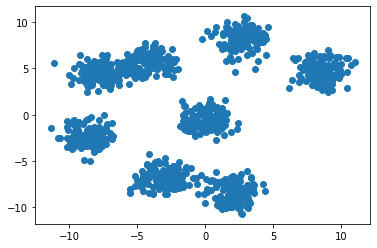

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
# generate distance matrix with linkage function 


distances = linkage(X, method= "centroid", metric = "euclidean")
print(distances)



[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


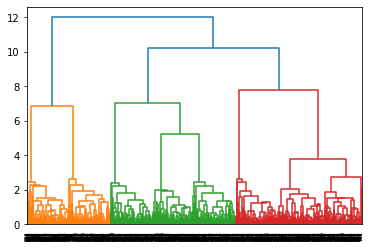

In [5]:
dn = dendrogram(distances)
plt.show()

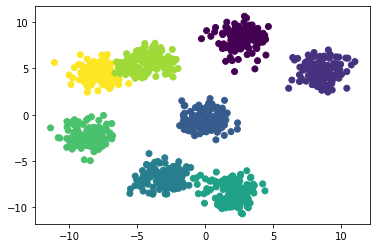

In [6]:
scipy_clusters = fcluster(distances, 3, criterion = "distance")
plt.scatter(X[:, 0], X[:,1], c=scipy_clusters)
plt.show()


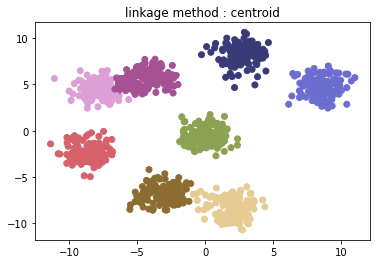

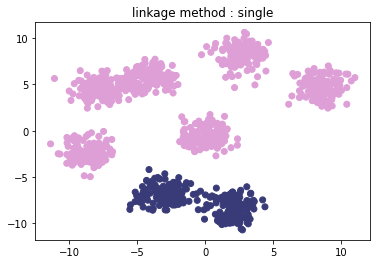

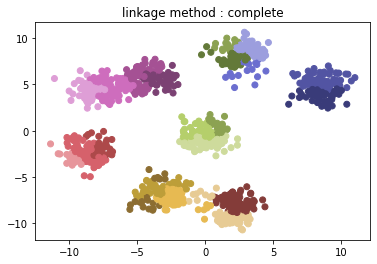

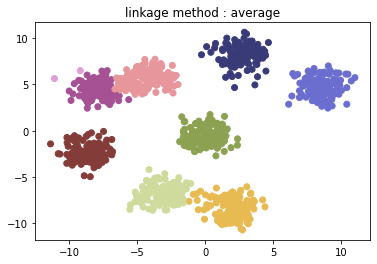

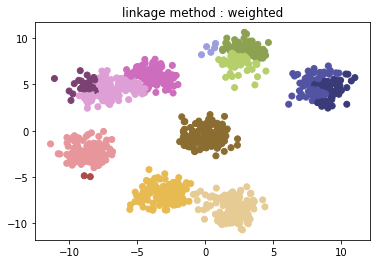

In [7]:
methods = ["centroid", "single", "complete", "average", "weighted"]

for method in methods :
    distances = linkage(X, method= method, metric = "euclidean")
    scipy_clusters = fcluster(distances, 3, criterion = "distance")
    plt.title('linkage method : '+ method)
    plt.scatter(X[:, 0], X[:,1], c=scipy_clusters, cmap='tab20b')
    plt.show()


In [8]:
# Using different alg together 

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

wine_df = pd.read_csv("wine_data.csv")

print(wine_df.head)


<bound method NDFrame.head of      OD_read  Proline
0       3.92   1065.0
1       3.40   1050.0
2       3.17   1185.0
3       3.45   1480.0
4       2.93    735.0
..       ...      ...
173     1.74    740.0
174     1.56    750.0
175     1.56    835.0
176     1.62    840.0
177     1.60    560.0

[178 rows x 2 columns]>


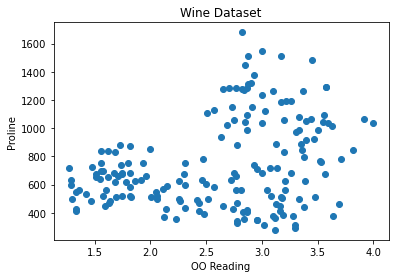

In [9]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])

plt.title("Wine Dataset")
plt.xlabel("OO Reading")
plt.ylabel("Proline")
plt.show()

In [10]:
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)


In [11]:
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)



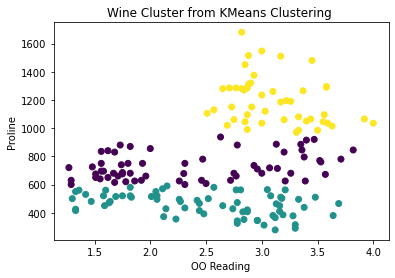

In [12]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_clusters)

plt.title("Wine Cluster from KMeans Clustering ")
plt.xlabel("OO Reading")
plt.ylabel("Proline")
plt.show()

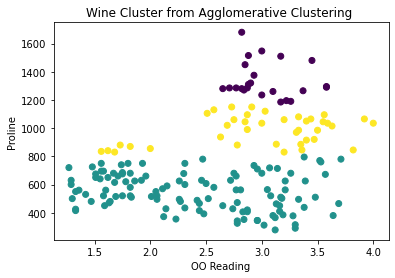

In [13]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=ac_clusters)

plt.title("Wine Cluster from Agglomerative Clustering ")
plt.xlabel("OO Reading")
plt.ylabel("Proline")
plt.show()

In [14]:
print("silhouette_score for Wine Dataset \n")
print("Kmeans Clustering : ", silhouette_score(wine_df, km_clusters))
print("Agg Clustering : ", silhouette_score(wine_df, ac_clusters))


silhouette_score for Wine Dataset 

Kmeans Clustering :  0.5809421087616886
Agg Clustering :  0.5988495817462
